In [1]:
import tensorflow as tf
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
df=pd.read_csv("cleaned_reviews.csv")
df

,Name,Review,Number of Stars,Cleaned_Review
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...
...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...


In [3]:
df = df[df['Review'] != 'No review text found']
df

,Name,Review,Number of Stars,Cleaned_Review
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...
...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...


In [4]:
df.isna().sum()

Name               0
Review             1
Number of Stars    1
Cleaned_Review     2
dtype: int64

In [5]:
df= df.dropna()

In [6]:
df['sentiment'] = df['Number of Stars'].apply(lambda x: 1 if x >= 3 else 0 )

C:\Users\hugod\AppData\Local\Temp\ipykernel_17772\59171303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Number of Stars'].apply(lambda x: 1 if x >= 3 else 0 )


In [7]:
df

,Name,Review,Number of Stars,Cleaned_Review,sentiment
0,AARDY,Denise was terrific! I had put in some parame...,5.0,denise terrific put parameter website trip tan...,1
1,AARDY,"The website is clear, informative and easy to ...",5.0,website clear informative easy navigate decide...,1
2,AARDY,After looking online at AARDY for a travel ins...,5.0,looking online aardy travel insurance policy c...,1
3,AARDY,The agent was friendly and knowledgeable. She...,5.0,agent friendly knowledgeable looked previous t...,1
4,AARDY,She took the time to make sure I understood al...,5.0,took time make sure understood option help mak...,1
...,...,...,...,...,...
5996,sevencorners,Very slow claim process time. Difficult to re...,1.0,slow claim process time difficult reach phone,0
5997,sevencorners,I have submitted payment reimbursements twice ...,1.0,submitted payment reimbursement twice claim ne...,0
5998,sevencorners,These guys are just awful. At the beginning of...,1.0,guy awful beginning pandemic purchased cancel ...,0
5999,sevencorners,We have been using Seven corners for a few tim...,5.0,using seven corner time always great companywe...,1


In [8]:
df[50:100]

,Name,Review,Number of Stars,Cleaned_Review,sentiment
50,AARDY,"Janet was easy to understand, patient, and hel...",5.0,janet easy understand patient helpful put ease...,1
51,AARDY,Christianna was friendly and patient. She help...,5.0,christianna friendly patient helped find best ...,1
52,AARDY,Website has most complete travel insurance inf...,5.0,website complete travel insurance info anywher...,1
53,AARDY,It was very easy to buy travel insurance onlin...,5.0,easy buy travel insurance online website user ...,1
54,AARDY,"The lady that I spoke to was very pleasant, he...",5.0,lady spoke pleasant helpful well informed,1
55,AARDY,The person I spoke with was very knowledgeable...,5.0,person spoke knowledgeable super nice,1
56,AARDY,Miranda was very helpful. She guided us throu...,5.0,miranda helpful guided u policy looking helped...,1
57,AARDY,I spoke with Janet and Miranda of AARDY. They...,5.0,spoke janet miranda aardy knowledgeable helpfu...,1
58,AARDY,Well there seem to be a IT problem when I paid...,4.0,well seem problem paid policy team aardy helpf...,1
59,AARDY,ardy stands out as a reliable travel insurance...,5.0,ardy stand reliable travel insurance provider ...,1


###Visualise the number of positive =1, negative=0 and neutral=2 reviews

<AxesSubplot:>

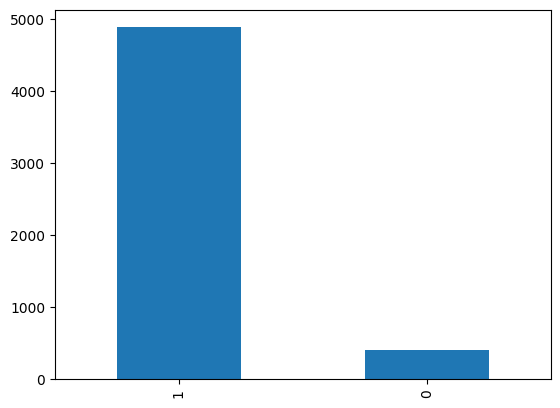

In [9]:
df['sentiment'].value_counts().plot(kind='bar')

###Visualise the number of positive =1, negative=0 and neutral=2 reviews within the same company

<AxesSubplot:xlabel='Name'>

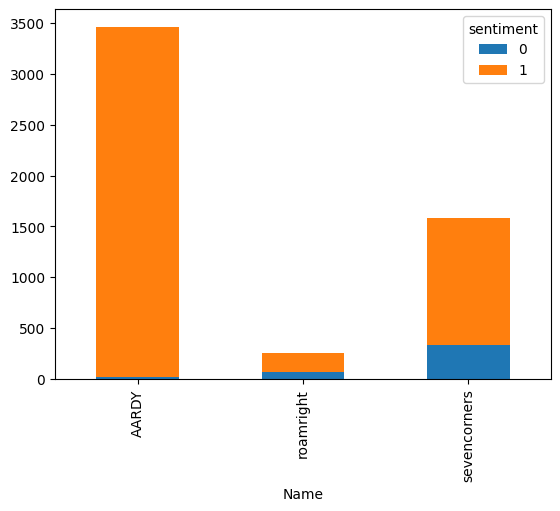

In [10]:
df.groupby(['Name', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)

###Text augmentation

In [11]:
!pip install nlpaug


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [12]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Assuming your DataFrame is named 'df' and you have a column 'sentiment' and 'Cleaned_Review'
positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]
# neutral_reviews = df[df['sentiment'] == 2]

# Calculate the number of positive reviews
num_positive_reviews = len(positive_reviews)

# Resample negative and neutral reviews to match the number of positive reviews
augmented_negative_reviews = negative_reviews.sample(n=num_positive_reviews, replace=True)
# augmented_neutral_reviews = neutral_reviews.sample(n=num_positive_reviews, replace=True)

# Use nlpaug to perform text augmentation on the 'Cleaned_Review' column
aug = naw.SynonymAug(aug_src='wordnet')
augmented_negative_reviews['Cleaned_Review'] = augmented_negative_reviews['Cleaned_Review'].apply(lambda x: aug.augment(x))
# augmented_neutral_reviews['Cleaned_Review'] = augmented_neutral_reviews['Cleaned_Review'].apply(lambda x: aug.augment(x))

# Concatenate the original positive reviews with augmented negative and neutral reviews
balanced_df = pd.concat([positive_reviews, augmented_negative_reviews])

# Shuffle the DataFrame to mix the positive, negative, and neutral reviews
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [13]:
balanced_df= balanced_df.sample(1000)

###Using BERT pretrained model

In [14]:
reviews = balanced_df['Review'].values.tolist()
labels = balanced_df['sentiment'].tolist()

In [15]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [16]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer([training_sentences[0]], truncation=True,

                            padding=True, max_length=128)

{'input_ids': [[101, 2698, 8413, 2165, 1996, 4737, 2055, 2256, 2048, 2733, 4440, 2000, 5978, 1012, 2057, 4033, 1005, 1056, 6158, 2005, 1037, 2096, 2144, 2522, 17258, 1011, 2539, 1998, 2698, 8413, 1005, 2565, 2435, 2149, 7023, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [17]:

train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [19]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [20]:
from transformers import TFDistilBertForSequenceClassification

# ... [your data preprocessing code] ...

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)

model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2


50/50 [==============================] - 516s 10s/step - loss: 0.2835 - accuracy: 0.8650 - precision: 0.9621 - recall: 0.7606 - auc: 0.9096 - val_loss: 0.1194 - val_accuracy: 0.9600 - val_precision: 0.9307 - val_recall: 0.9895 - val_auc: 0.9708
Epoch 2/2
50/50 [==============================] - 513s 10s/step - loss: 0.0801 - accuracy: 0.9775 - precision: 0.9873 - recall: 0.9676 - auc: 0.9824 - val_loss: 0.0432 - val_accuracy: 0.9950 - val_precision: 1.0000 - val_recall: 0.9895 - val_auc: 0.9947


In [46]:
#plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(val_dataset.shuffle(100).batch(16))
y_pred = np.argmax(y_pred, axis=1)
y_true = validation_labels
cm = confusion_matrix(y_true, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()


    


KeyError: 'loss'

In [23]:
model.save_pretrained("./sentiment_2")

In [27]:
# loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment2")
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("C:/Users/hugod/OneDrive/Documents/Annee5_DIA/nlp_project_hasna_hugo_rendu/sentiment_2")


Some layers from the model checkpoint at C:/Users/hugod/OneDrive/Documents/Annee5_DIA/nlp_project_hasna_hugo_rendu/sentiment_2 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_39']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at C:/Users/hugod/OneDrive/Documents/Annee5_DIA/nlp_project_hasna_hugo_rendu/sentiment_2 and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-

In [41]:
# test_sentence = "i waste my money"
test_sentence = "amazing"

predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

# Get the model's prediction
tf_output = loaded_model.predict(predict_input)[0]

# Since it's a binary classification, the output is a single probability value
# for the positive class. We use 0.5 as a threshold to decide the class.
predicted_prob = tf.sigmoid(tf_output).numpy()[0][0]
predicted_class = 'positif' if predicted_prob >= 0.5 else 'negatif'

print(f"Prediction: {predicted_class} (Probability: {predicted_prob:.2f})")


1/1 [==============================] - 0s 35ms/step
Prediction: positif (Probability: 0.99)


In [47]:
# test_sentence = "i waste my money"
test_sentence = "this is not good at all"

predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

# Get the model's prediction
tf_output = loaded_model.predict(predict_input)[0]

# Since it's a binary classification, the output is a single probability value
# for the positive class. We use 0.5 as a threshold to decide the class.
predicted_prob = tf.sigmoid(tf_output).numpy()[0][0]
predicted_class = 'positif' if predicted_prob >= 0.5 else 'negatif'

print(f"Prediction: {predicted_class} (Probability: {predicted_prob:.2f})")


1/1 [==============================] - 0s 105ms/step
Prediction: negatif (Probability: 0.10)


In [58]:
test_sentence = "i they did better than the other"

predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

# Get the model's prediction
tf_output = loaded_model.predict(predict_input)[0]

# Since it's a binary classification, the output is a single probability value
# for the positive class. We use 0.5 as a threshold to decide the class.
predicted_prob = tf.sigmoid(tf_output).numpy()[0][0]
predicted_class = 'positif' if predicted_prob >= 0.5 else 'negatif'

print(f"Prediction: {predicted_class} (Probability: {predicted_prob:.2f})")


1/1 [==============================] - 0s 41ms/step
Prediction: positif (Probability: 0.98)


In [ ]:
# from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
# import tensorflow as tf
# from IPython.display import display, HTML


# def predict_sentiment(user_input):
#     predict_input = tokenizer.encode(user_input, truncation=True, padding=True, return_tensors="tf")
#     tf_output = loaded_model.predict(predict_input)[0]
#     tf_prediction = tf.nn.softmax(tf_output, axis=1)
#     labels = ['0', '1']
#     label = tf.argmax(tf_prediction, axis=1)
#     prediction = labels[label[0]]
#     return prediction

# def interactive_interface():
#     display(HTML("<h1>Sentiment Analysis</h1>"))
#     user_input = input("Enter your text: ")
#     prediction = predict_sentiment(user_input)
#     display(HTML(f"<p>You entered: {user_input}</p>"))
#     display(HTML(f"<p>Prediction: {prediction}</p>"))

# interactive_interface()


Enter your text: i waste my money
1/1 [==============================] - 0s 44ms/step
